# <img src="https://m.media-amazon.com/images/W/MEDIAX_792452-T2/images/I/81vOF2Rr2tS.jpg" width="60" />  
# **Prediction of Close Cotation of Bitcoin** 
### First Step : Load The Data 
We Load the Data Base from the API wich contains 1 day inteval cotation of Bitcoin 


In [51]:
from crypto_module import *

- Use the API

In [52]:
symbol = 'BTC/USD'
interval = '1day'
start_date = '2022-01-01 00:00:00'
end_date = '2022-12-31 00:00:00'

In [53]:
data = load_data(symbol, start_date, end_date, interval)
data

,datetime,open,high,low,close
0,2022-01-01,46211.19922,47963.28906,46211.19922,47735.12891
1,2022-01-02,47730.00000,47966.16016,46695.33984,47305.01172
2,2022-01-03,47304.21875,47578.96094,45716.50000,46439.19141
3,2022-01-04,46459.57031,47517.35156,45550.98828,45815.32812
4,2022-01-05,45811.16016,47054.82812,42500.00000,43437.66016
...,...,...,...,...,...
360,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047
361,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039
362,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922
363,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977


- We can verifie if the Data Set is clean

In [54]:
data.isna().sum()

datetime    0
open        0
high        0
low         0
close       0
dtype: int64

- There are no Nan Values, load_data() works
- We can verifie if the type of element of the close colone is float to plot it properly

In [55]:
data['close']

0      47735.12891
1      47305.01172
2      46439.19141
3      45815.32812
4      43437.66016
          ...     
360    16697.98047
361    16538.40039
362    16631.19922
363    16602.00977
364    16528.02930
Name: close, Length: 365, dtype: float64

### We can visualize the Data
- We can code two functions for visualizing the Close price and the candels which represent the outcome of the market on the considered interval

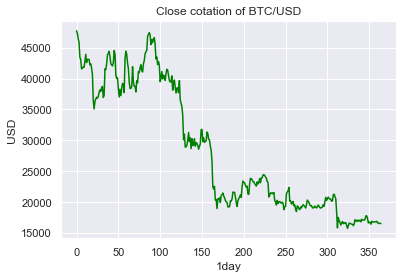

In [56]:
visualize_data(data, symbol, interval)
finance_visualize(data, symbol, interval)

### The Next step is to enrich the Database by adding indicators
- Indicators used are The Relative Strength Index (RSI), The Exponential Moving Average (EMA) and The Average True Range (ATR) 
    - The RSI measures the speed and change of price movements (momentum)
    - The EMA is a movig average that gives more weight to recent price, it seems to be relevent for predicting (trend)
    - The ATR quantifies the volatility (volaltility)

- Those indicators are computed over the 14 last days
  

In [57]:
final_data = add_indicators(data)
final_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,42581.64844,43462.78906,41766.66016,43090.78125,35.568008,43772.612563,2049.218750
1,2022-01-15,43089.08984,43809.28125,42579.42969,43087.21094,35.548190,43681.225680,1990.692522
2,2022-01-16,43098.19922,43492.07812,42610.44922,43099.76172,35.683860,43603.697152,1911.473692
3,2022-01-17,43104.35156,43199.91016,41568.76172,42216.80078,30.775756,43418.777635,1891.450460
4,2022-01-18,42218.01172,42682.64844,41288.87891,42369.82031,32.508293,43278.916659,1855.901822
...,...,...,...,...,...,...,...,...
347,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047,44.769321,16866.858029,369.682940
348,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039,42.154285,16823.063677,365.152714
349,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922,44.195619,16797.481750,351.276850
350,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977,43.673548,16771.418819,346.564273


### We can visualize the indicators 

#### EMA Indicator : 

In [58]:
indicator = 'EMA'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### RSI Indicator :

In [59]:
indicator = 'RSI'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### ATR Indicator : 

In [60]:
indicator = 'ATR'
visualize_with_indicator(final_data, symbol, interval, indicator)

# Prediction Model
#### First of all we have to scale the data for the models
- We recall that we want to predict the close price of Bitcoin

In [61]:
scaled_data = scaling_data(final_data)
scaled_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,0.846117,0.851405,0.834075,0.862553,0.390664,0.945616,0.742401
1,2022-01-15,0.862123,0.862250,0.859884,0.862440,0.390319,0.942433,0.717078
2,2022-01-16,0.862410,0.852322,0.860869,0.862836,0.392680,0.939733,0.682802
3,2022-01-17,0.862604,0.843177,0.827791,0.834970,0.307264,0.933293,0.674138
4,2022-01-18,0.834648,0.826986,0.818903,0.839800,0.337416,0.928423,0.658757
...,...,...,...,...,...,...,...,...
347,2022-12-27,0.036616,0.021966,0.035019,0.029610,0.550794,0.008590,0.015697
348,2022-12-28,0.029701,0.016013,0.030708,0.024574,0.505285,0.007065,0.013737
349,2022-12-29,0.024657,0.012236,0.031176,0.027503,0.540810,0.006174,0.007733
350,2022-12-30,0.027595,0.011758,0.027057,0.026582,0.531725,0.005266,0.005694


#### First Model : Linear Regression

- We use linear regression to predict the the considered prediction time, in the following example we predict the price 60 days later 


In [62]:
prediction_time = 60 # We want to predict the close price 60 days Later 
regressor = ['close'] # We choose One regressor which is the colse price itself
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

NameError: name 'data_preprocess' is not defined

- We apply the simple linear regression and we obtain the following prediction 

In [63]:

regression_matrix, future_price, r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

visualize_linear_reg(regression_matrix, scaled_data)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

- We can zoom the see the prediction better 

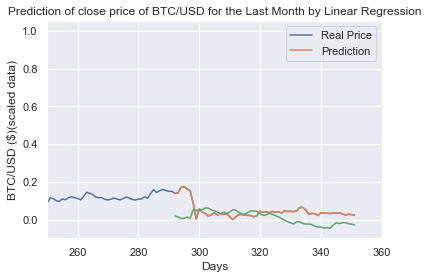

In [64]:
visualize_linear_reg(regression_matrix, scaled_data, zoom = [250, 360])

- We have compute the $R^{2}$ indicator to judge the relevance of the model

In [65]:
r2

0.6046696483894196

- The $R^{2}$ shows that the linear regression is not that much adapted for time series like the close price 
#### For the next step we can visualize the prediction of the next 60 days, which correspond to the first two months of 2023

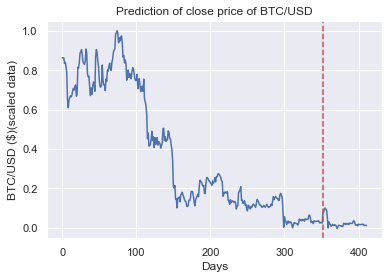

In [29]:
visualize_future(scaled_data, future_price)

#### We can also try the multiple linear regression
#### First of all, we analyse de Covariance Matrix to see the correlation between variables

<function matplotlib.pyplot.show(close=None, block=None)>

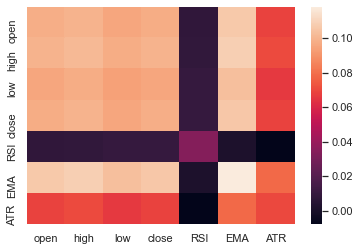

In [30]:
cov_matrix = scaled_data.drop('datetime', axis=1).cov()
sns.heatmap(cov_matrix)
plt.show

- We can check the values to have antother point of view 

In [33]:
cov_matrix['close']


open     0.097515
high     0.099569
low      0.095861
close    0.098044
RSI      0.010024
EMA      0.106084
ATR      0.068542
Name: close, dtype: float64

- It seems that the Close Price is relativelly high correlated with the EMA indicator, we can add the EMA indicator to the Regressos 

In [45]:
regressor = ['close', 'ATR']
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

In [46]:
regression_matrix, future_price, r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

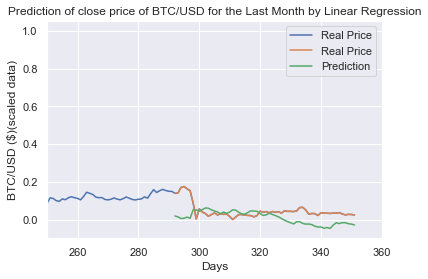

In [50]:
visualize_linear_reg(regression_matrix, scaled_data, zoom=[250, 360])

In [ ]:
def apply_linear_regression(scaled_data, prediction_time, price, target, regressor):

    price_train, price_test, target_train, target_test = train_test_split(price, target, test_size = 0.7)
    lr = LinearRegression().fit(price_train, target_train)

    price_to_predict = price[-prediction_time:] 
    lr_prediction = lr.predict(price_to_predict)


    prediction_matrix = pd.DataFrame(scaled_data['close'].tail(prediction_time))
    prediction_matrix['prediction'] = lr_prediction

    price_to_future = np.array(scaled_data[regressor])[-prediction_time:]
    future = lr.predict(price_to_future)

    target_predict = lr.predict(price_test)
    r2 = r2_score(target_test, target_predict)

    return prediction_matrix, future, r2 